## Importing data


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
ESB_charger_data = pd.read_csv(r'C:\Users\92330\OneDrive\Desktop\Faraz\CV AND COVER LETTER\Data Analyst\ESB\Project\ESB charge point locations.csv')
EVregdata = pd.read_csv(r'C:\Users\92330\OneDrive\Desktop\Faraz\CV AND COVER LETTER\Data Analyst\ESB\Project\csv files\10 year parsed EV Registrations.csv')
ALL_chargers= pd.read_csv(r'C:\Users\92330\OneDrive\Desktop\Faraz\CV AND COVER LETTER\Data Analyst\ESB\Project\csv files\Total chargers by county(including ESB).csv')

In [74]:
ESB_charger_data

,Territory,County,Address,Max.Sim.CCS,Max.Sim.CHAd eMo,Max.Sim.Fast AC,Max.Sim. AC Socket,CCS kWs,CHAd eMO kWs,AC Fast kWs,AC Socket kWs,Latitude,Longitude,Open Hours,Route / Exit
0,RoI,Carlow,"The Parade, Bagenalstown",0,0.0,0.0,2,NaN,NaN,NaN,22(2),52.702794,-6.955983,24 x 7,NaN
1,NaN,NaN,"Tesco Carlow, Fairgreen Shopping Centre,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RoI,Carlow,"Carlow, Carlow",0,0.0,0.0,2,NaN,NaN,NaN,22(2),52.834672,-6.922117,24 x 7,NaN
3,NaN,NaN,"Four Lakes Retail Park, Dublin Road, Carlow",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RoI,Carlow,Town,1,1.0,1.0,0,50,50,43,NaN,52.846593,-6.902268,24 x 7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,07/11/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573,28/11/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1574,27/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1575,07/11/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis of EV Charge Points

In [75]:
#getting ESB charger data

ESB_charger_data=ESB_charger_data.dropna(subset=['County'],axis=0)

In [76]:
#creating a list of counties in Republic of Ireland so that we can exclude Nothern Ireland Chargers

list=['Sligo','Roscommon','Galway','Mayo','Leitrim','Wexford','Wicklow','Westmeath','Offaly','Meath','Laois','Louth','Longford','Kilkenny','Kildare','Dublin','Carlow','Limerick','Kerry','Tipperary','Waterford','Clare','Cork','Monaghan','Donegal','Cavan',]

In [77]:
#creating dataframe

ChargersByCounty = pd.DataFrame(columns=['County', 'ESB_Charger_Count'])
ChargersByCounty

,County,ESB_Charger_Count


In [78]:
#finding number of chargers per county from ESB data and inputting into Data Frame

i=0
for county in (list):
    df=ESB_charger_data[ESB_charger_data['County'].str.contains(list[i])]
    n = len(df)
    ChargersByCounty.loc[i] = [county,n]
    i=i+1
ChargersByCounty


,County,ESB_Charger_Count
0,Sligo,7
1,Roscommon,11
2,Galway,22
3,Mayo,16
4,Leitrim,2
5,Wexford,20
6,Wicklow,16
7,Westmeath,15
8,Offaly,9
9,Meath,18


In [79]:
#merging column from data of ALL chargers county-wise into the existing to get 1 single data frame for analysis

ChargersByCounty['Total_Chargers']= ALL_chargers['Total_Chargers']
ChargersByCounty


,County,ESB_Charger_Count,Total_Chargers
0,Sligo,7,17
1,Roscommon,11,12
2,Galway,22,82
3,Mayo,16,43
4,Leitrim,2,4
5,Wexford,20,41
6,Wicklow,16,33
7,Westmeath,15,25
8,Offaly,9,15
9,Meath,18,41


In [80]:
ChargersByCounty['NON_ESB_Chargers'] = ChargersByCounty['Total_Chargers'] - ChargersByCounty['ESB_Charger_Count'] 
ChargersByCounty

,County,ESB_Charger_Count,Total_Chargers,NON_ESB_Chargers
0,Sligo,7,17,10
1,Roscommon,11,12,1
2,Galway,22,82,60
3,Mayo,16,43,27
4,Leitrim,2,4,2
5,Wexford,20,41,21
6,Wicklow,16,33,17
7,Westmeath,15,25,10
8,Offaly,9,15,6
9,Meath,18,41,23


In [81]:
#data cleaning for plot

charger_graph_data= ChargersByCounty.drop(columns=['Total_Chargers'])
charger_graph_data

,County,ESB_Charger_Count,NON_ESB_Chargers
0,Sligo,7,10
1,Roscommon,11,1
2,Galway,22,60
3,Mayo,16,27
4,Leitrim,2,2
5,Wexford,20,21
6,Wicklow,16,17
7,Westmeath,15,10
8,Offaly,9,6
9,Meath,18,23


<Figure size 2000x1200 with 0 Axes>

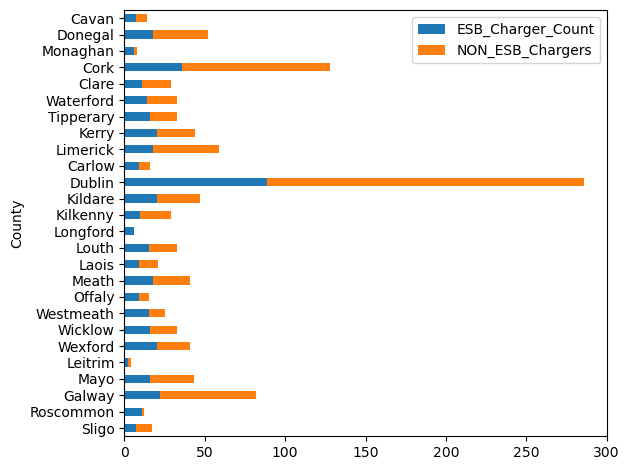

In [82]:
#plotting ESB chargers as 100% bar chart against non ESB chargers, county-wise

plt.figure(figsize=(20, 12))
charger_graph_data.plot.barh(x='County',stacked =True)
plt.tight_layout()
plt.show()

## Data Analysis of EV Registrations in Ireland

In [83]:
#calculating total EV registrations in Ireland from county-wise data

AllIre = EVregdata.groupby(['Date'])['Total_Registrations'].sum().reset_index()
ir_graph_data = AllIre.sort_values(by= ['Date']) 
ir_graph_data = ir_graph_data[ir_graph_data.Total_Registrations !=0.0]
ir_graph_data
ir_graph_data['Date'] = pd.to_datetime(ir_graph_data.Date, format='%Y-%m-%d')
ir_graph_data['Year'] = ir_graph_data['Date'].dt.year
ir_graph_data

,Date,Total_Registrations,Year
0,2014-01-01,53.0,2014
1,2014-02-01,71.0,2014
2,2014-03-01,102.0,2014
3,2014-04-01,112.0,2014
4,2014-05-01,121.0,2014
...,...,...,...
122,2024-03-01,102472.0,2024
123,2024-04-01,104641.0,2024
124,2024-05-01,106381.0,2024
125,2024-06-01,107176.0,2024


In [95]:
#getting top 10 counties with most EV registrations since 2014

total_county_reg = EVregdata[EVregdata['Date'].str.contains('2024-07-01')].sort_values(by= ['Total_Registrations'], ascending = False)
top_ten_counties = total_county_reg.reset_index().drop(columns=['index','Registrations']).head(10)
top_ten_counties

,County,Year,Month,Date,Total_Registrations
0,Dublin,2024,Jul,2024-07-01,56629.0
1,Cork,2024,Jul,2024-07-01,11839.0
2,Kildare,2024,Jul,2024-07-01,5965.0
3,Meath,2024,Jul,2024-07-01,4342.0
4,Galway,2024,Jul,2024-07-01,3935.0
5,Wicklow,2024,Jul,2024-07-01,3773.0
6,Limerick,2024,Jul,2024-07-01,2934.0
7,Wexford,2024,Jul,2024-07-01,2432.0
8,Waterford,2024,Jul,2024-07-01,2098.0
9,Louth,2024,Jul,2024-07-01,2078.0


In [102]:
#getting top 10 counties with most EV registrations since 2014 and also their respective EV/Charger ratio

total_county_reg = EVregdata[EVregdata['Date'].str.contains('2024-07-01')]
total_county_reg = total_county_reg.reset_index().drop(columns=['index'])
total_county_reg["Total_Chargers"] = ChargersByCounty["Total_Chargers"]
total_county_reg["EV/Chargers Ratio"] = total_county_reg["Total_Registrations"]/total_county_reg["Total_Chargers"]
total_county_reg['EV/Chargers Ratio'] = total_county_reg['EV/Chargers Ratio'].astype(int)
total_county_reg = total_county_reg.sort_values(by= ['Total_Registrations'], ascending = False).head(10)
top_ten_counties = total_county_reg.reset_index().drop(columns=['index','Registrations'])
top_ten_counties

,County,Year,Month,Date,Total_Registrations,Total_Chargers,EV/Chargers Ratio
0,Dublin,2024,Jul,2024-07-01,56629.0,286,198
1,Cork,2024,Jul,2024-07-01,11839.0,128,92
2,Kildare,2024,Jul,2024-07-01,5965.0,47,126
3,Meath,2024,Jul,2024-07-01,4342.0,41,105
4,Galway,2024,Jul,2024-07-01,3935.0,82,47
5,Wicklow,2024,Jul,2024-07-01,3773.0,33,114
6,Limerick,2024,Jul,2024-07-01,2934.0,59,49
7,Wexford,2024,Jul,2024-07-01,2432.0,41,59
8,Waterford,2024,Jul,2024-07-01,2098.0,33,63
9,Louth,2024,Jul,2024-07-01,2078.0,33,62


In [103]:
#creating a list of top 10 counties by EV Registrations from the above dataframe for later use

top_ten_county_list = top_ten_counties['County'].tolist()
top_ten_county_list

['Dublin',
 'Cork',
 'Kildare',
 'Meath',
 'Galway',
 'Wicklow',
 'Limerick',
 'Wexford',
 'Waterford',
 'Louth']

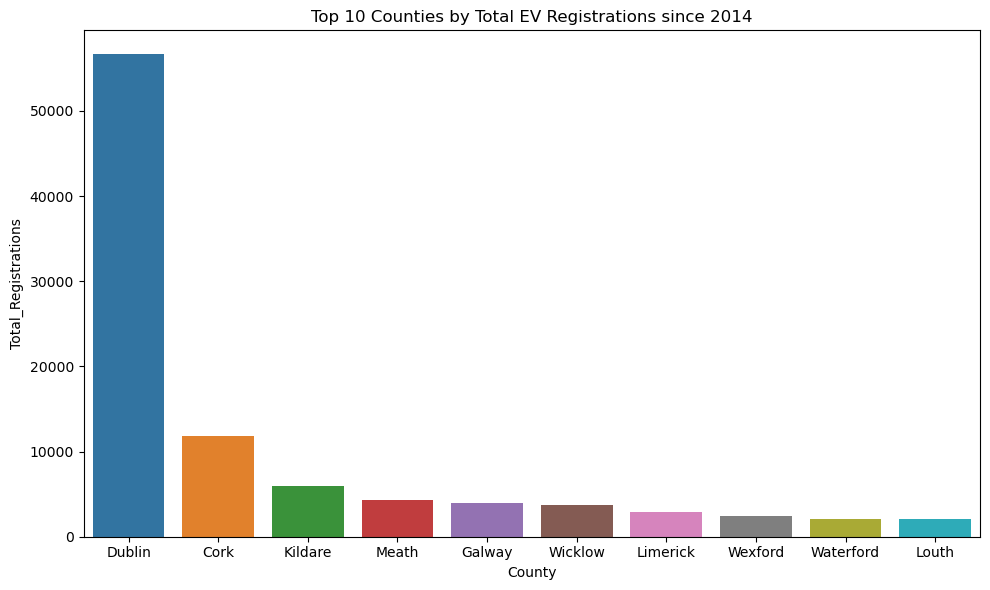

In [15]:
#plotting bar chart of  top 10 counties with most EV registration since 2014

plt.figure(figsize=(10, 6))
sns.barplot(x='County', y='Total_Registrations', data=top_ten_counties)
plt.title('Top 10 Counties by Total EV Registrations since 2014')
plt.tight_layout()

In [16]:
#formatting date for graph

EVregdata['Date'] = pd.to_datetime(EVregdata.Date, format='%Y-%m-%d')
EVregdata


,County,Year,Month,Date,Registrations,Total_Registrations
0,Sligo,2014,Jan,2014-01-01,0.0,0.0
1,Sligo,2014,Feb,2014-02-01,0.0,0.0
2,Sligo,2014,Mar,2014-03-01,0.0,0.0
3,Sligo,2014,Apr,2014-04-01,0.0,0.0
4,Sligo,2014,May,2014-05-01,0.0,0.0
...,...,...,...,...,...,...
3427,Cavan,2024,Aug,2024-08-01,NaN,NaN
3428,Cavan,2024,Sep,2024-09-01,NaN,NaN
3429,Cavan,2024,Oct,2024-10-01,NaN,NaN
3430,Cavan,2024,Nov,2024-11-01,NaN,NaN


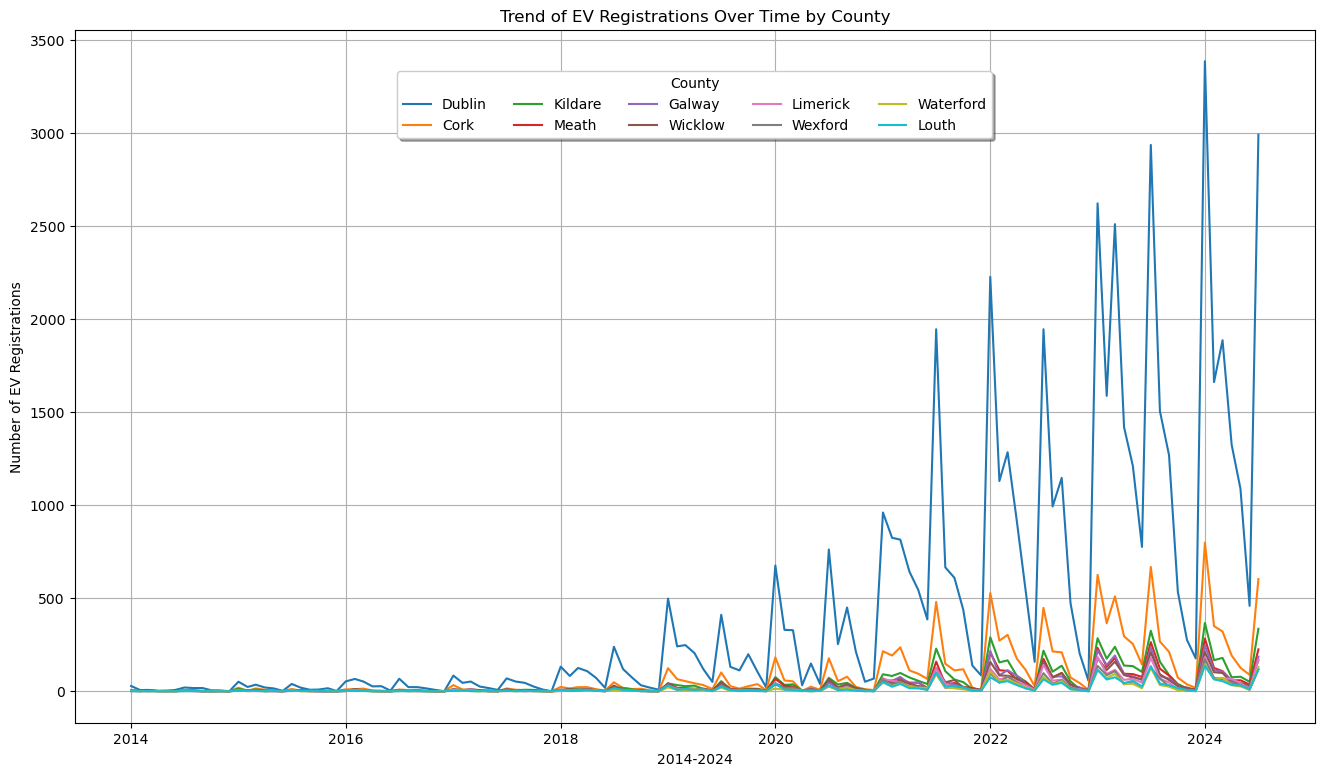

In [17]:
#Plotting graph for top 10 county registrations (Seasonal) over time

plt.figure(figsize=(16, 9))
for county in (top_ten_county_list):
    county_data = EVregdata[EVregdata['County'].str.contains(county)]
    plt.plot(county_data['Date'], county_data['Registrations'], label=county)
    

plt.title('Trend of EV Registrations Over Time by County')
plt.xlabel('2014-2024')
plt.ylabel('Number of EV Registrations')
plt.legend(title='County', loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=5, fancybox=True, shadow=True) 
plt.grid(True)
plt.show()


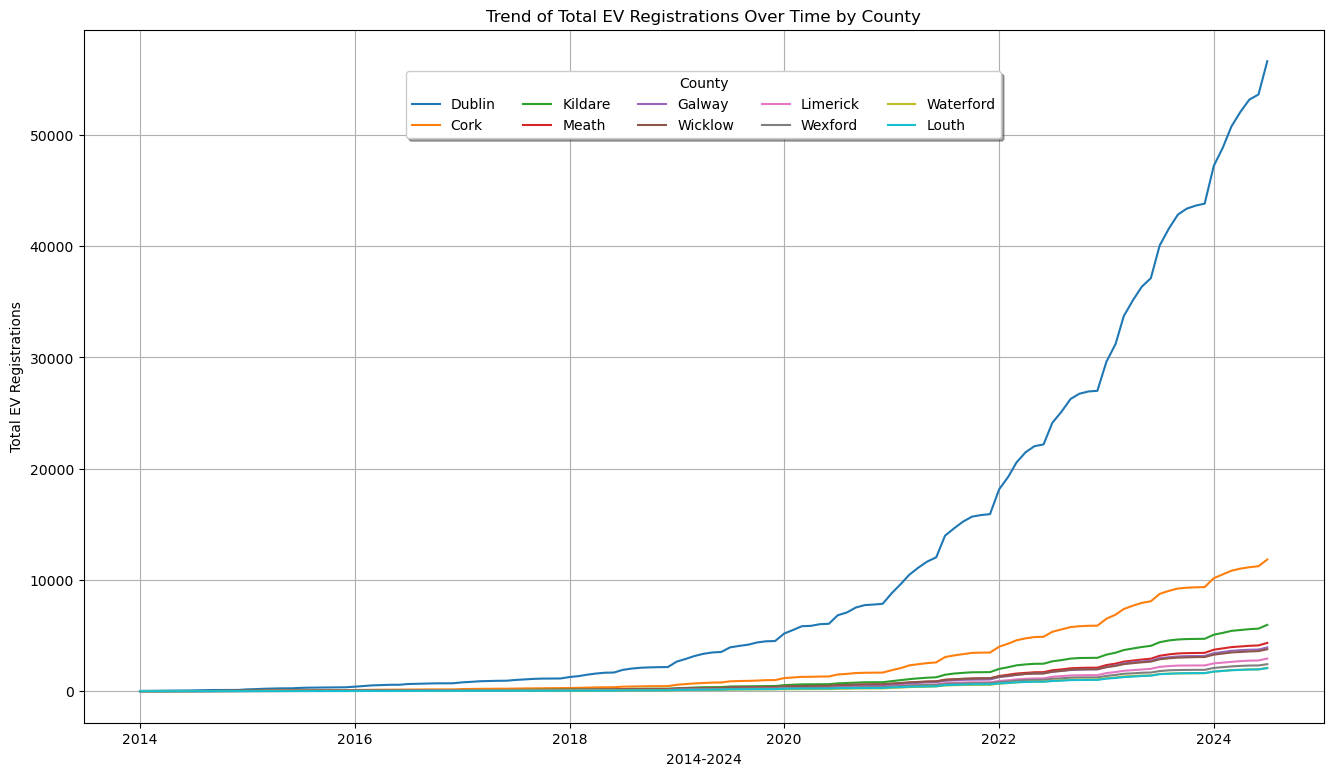

In [18]:
#Plotting graph for  top 10 county Total registrations (running sum) over time

plt.figure(figsize=(16, 9))
for county in (top_ten_county_list):
    county_data = EVregdata[EVregdata['County'].str.contains(county)]
    plt.plot(county_data['Date'], county_data['Total_Registrations'], label=county)
    

plt.title('Trend of Total EV Registrations Over Time by County')
plt.xlabel('2014-2024')
plt.ylabel('Total EV Registrations')
plt.legend(title='County', loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=5, fancybox=True, shadow=True) 
plt.grid(True)
plt.show()

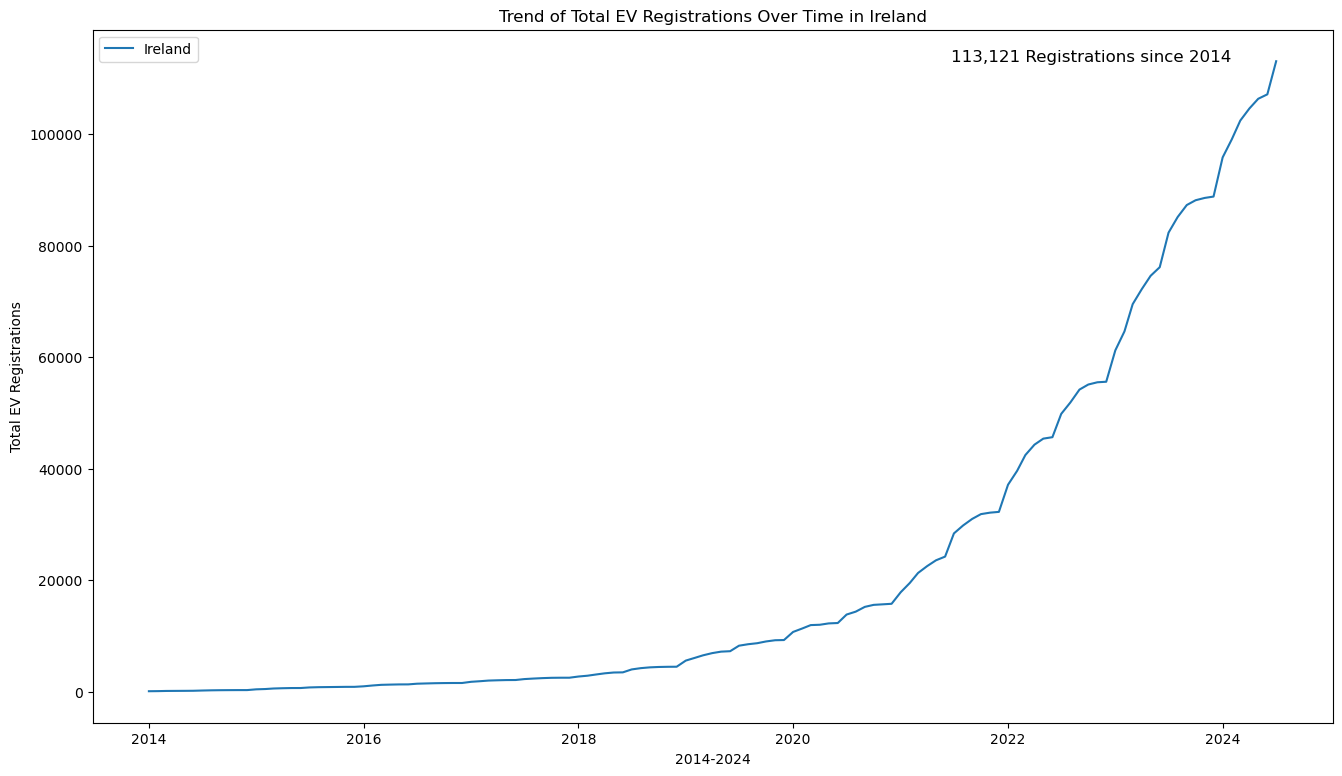

In [19]:
#plotting 10 year graph for trend for Ireland

plt.figure(figsize=(16, 9))
plt.plot(ir_graph_data['Date'], ir_graph_data['Total_Registrations'], label='Ireland')    
#plt.tick_params(labelbottom=False)
plt.title('Trend of Total EV Registrations Over Time in Ireland')
plt.xlabel('2014-2024')
plt.ylabel('Total EV Registrations')
plt.text(18800,113120, '113,121 Registrations since 2014', fontsize = 12)
plt.legend() 
plt.show()

## Train Test Split

In [20]:
#getting specific county data:

def specific_county_data(name):
    df=EVregdata[EVregdata['County'].str.contains(name)].reset_index()
    df.drop(columns=['index'], inplace= True)
    return df 
specific_county_data('Dublin')

,County,Year,Month,Date,Registrations,Total_Registrations
0,Dublin,2014,Jan,2014-01-01,28.0,28.0
1,Dublin,2014,Feb,2014-02-01,6.0,34.0
2,Dublin,2014,Mar,2014-03-01,7.0,41.0
3,Dublin,2014,Apr,2014-04-01,2.0,43.0
4,Dublin,2014,May,2014-05-01,3.0,46.0
...,...,...,...,...,...,...
127,Dublin,2024,Aug,2024-08-01,NaN,NaN
128,Dublin,2024,Sep,2024-09-01,NaN,NaN
129,Dublin,2024,Oct,2024-10-01,NaN,NaN
130,Dublin,2024,Nov,2024-11-01,NaN,NaN


In [21]:
#defining fuction for test split of Dublin Seasonal trend of EV Registrations 

def train_test_split_ts (df, train_size, test_size):
    
    """Function splits a given DataFrame into two sets based on the given 
    train and test sizes so that the data can be used for validation.
    -------------------------------
    Arguments:
    df: class: pandas.DataFrame
    The base dataframe that will be getting split.
    
    train_size: float
    The size of the desired training set (for example: 0.80)
    
    test_size: float
    The size of the desired training set (for example: 0.20)"""
    
    train_end_idx = int(round(len(df)*train_size,0))
    train_set = df.iloc[0:train_end_idx,:]["Registrations"]
    test_set = df.iloc[train_end_idx:,:]["Registrations"]
    return train_set, test_set

In [22]:
#defining fuction for train split for Dublin EV Registrations (seasonal) since 2014

def plot_train_test_split(train_data, test_data, county):
    
    """Function plots the training and testing data for visual inspection.
    -------------------------------
    Arguments:
    train_data: pandas.Series
    The training set of data to be plotted.
    
    test_data: pandas.Series
    The test set of data to be plotted.
    
    county: str
    Name of the county that the training and testing data belongs to. This 
    string is used to set the title of the axes."""
    
    plt.figure(figsize=(10, 6))
   
    train_data.plot(label='Train Data')
    test_data.plot(label='Test Data')
    
    ax=plt.gca()
    ax.set_xlabel('Months')
    ax.set_ylabel('EV Registrations')
    ax.set_title(f'EV Registrations in {county} County')
    ax.legend();

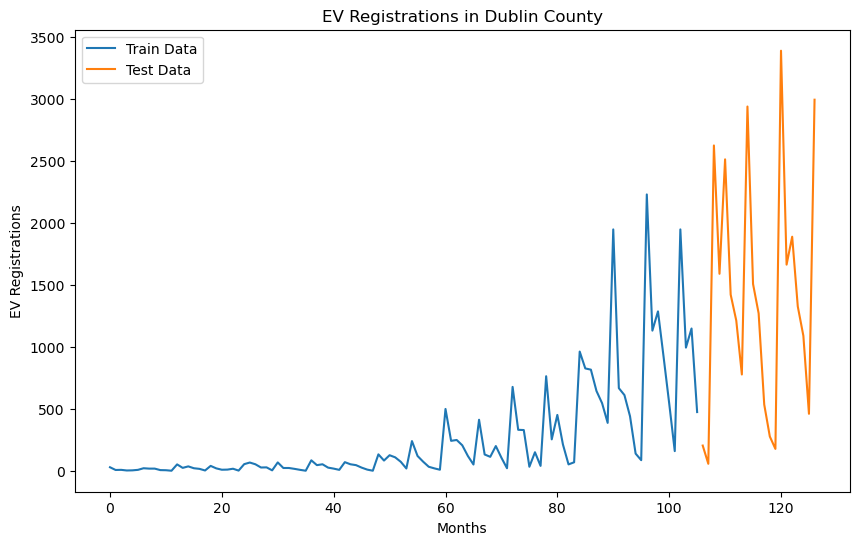

In [23]:
#splitting dataset into train and test sets for validation
train, test = train_test_split_ts(specific_county_data('Dublin'), 
                                            0.80, 0.20)
#plotting the split
plot_train_test_split(train, test, 'Dublin')

In [24]:
#defining fuction for test split for Dublin trend of Total EV Registrations (running sum)

def train_test_split_tts (df, train_size, test_size):
    
    """Function splits a given DataFrame into two sets based on the given 
    train and test sizes so that the data can be used for validation.
    -------------------------------
    Arguments:
    df: class: pandas.DataFrame
    The base dataframe that will be getting split.
    
    train_size: float
    The size of the desired training set (for example: 0.80)
    
    test_size: float
    The size of the desired training set (for example: 0.20)"""
    
    train_end_idx = int(round(len(df)*train_size,0))
    train_set = df.iloc[0:train_end_idx,:]["Total_Registrations"]
    test_set = df.iloc[train_end_idx:,:]["Total_Registrations"]
    return train_set, test_set

In [25]:
#defining fuction for train split for Dublin Total EV Registrations(running sum) since 2014

def plot_train_test_tsplit(train_data, test_data, county):
    
    """Function plots the training and testing data for visual inspection.
    -------------------------------
    Arguments:
    train_data: pandas.Series
    The training set of data to be plotted.
    
    test_data: pandas.Series
    The test set of data to be plotted.
    
    county: str
    Name of the county that the training and testing data belongs to. This 
    string is used to set the title of the axes."""
    
    plt.figure(figsize=(10, 6))
    
    train_data.plot(label='Train Data')
    test_data.plot(label='Test Data')
    
    ax=plt.gca()
    ax.set_xlabel('Months')
    ax.set_ylabel('Total EV Registrations')
    ax.set_title(f'Total EV Registrations in {county} County')
    ax.legend();

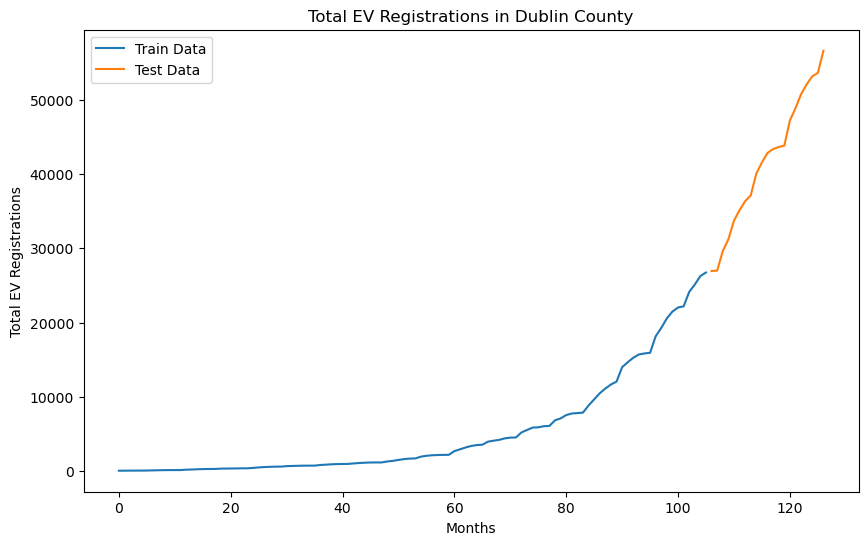

In [26]:
#splitting dataset into train and test sets for validation
train, test = train_test_split_tts(specific_county_data('Dublin'), 
                                            0.80, 0.20)

#plotting the split
plot_train_test_tsplit(train, test, 'Dublin')

## MODEL

In [27]:
#defining machine learning model

def get_forecast(model, train_data, test_data, plot=True):
    
    """Function gets forecasted values from a given model and plots them for 
    visual inspection. The length of the forecasts are dependent on the length 
    of the test data. The forecasted values are returned in a DataFrame format.
    -------------------------------
    Arguments:
    model:  SARIMAX or ARIMA model object
    Model that the forecast is to be received from. 
    
    train_data: pandas.Series
    The training set of data used in training the model.
    
    test_data: pandas.Series
    The testing set of data used for validating the model.
    
    plot: bool, default=True
    Option to plot the forecasted values along with observed values 
    (train_data and test_data).
    """
    
    #creating a df with the forecast information
    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    forecast_df['Forecasts'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-v0_8-darkgrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=train_data, color='black', ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index, 
                         y='Forecasts', color='blue', ax=ax, 
                         label='Forecasted Data', ls='--')
            sns.lineplot(data=test_data, color='purple', ax=ax, 
                         label='Actual Data', ls='-.')
            ax.fill_between(forecast_df.index, 
                            y1=forecast_df['Lower Confidence Interval'], 
                            y2=forecast_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Months')
            ax.legend(loc=2)
            plt.show();
    return forecast_df

In [28]:
#defining machine learning model (cont.)

def get_prediction(model, df, test_data, county_name, plot=True):
    
    """Function gets predicted values from a given model and plots them for 
    visual inspection. The length of the predictions are dependent on the 
    length of the test data. The forecasted values are returned in a DataFrame 
    format.
    -------------------------------
    Arguments:
    model:  SARIMAX or ARIMA model object
    Model to be used for making predictions.
    
    df: pandas.DataFrame
    DataFrame that contains all observed data.
    
    test_data: pandas.Series
    The testing set of data used for validating the model (dictates the length
    of predictions).
    
    plot: bool, default=True
    Option to plot the predicted values along with observed values.
    """
    
    #creating a df with the prediction information
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    prediction_df['Predictions'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-v0_8-darkgrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index, 
                         y='Predictions', color='orange', ax=ax, 
                         label='Predicted Data', ls='--')
            ax.fill_between(prediction_df.index, 
                            y1=prediction_df['Lower Confidence Interval'], 
                            y2=prediction_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Months')
            ax.set_ylabel('Electric Vehicles on the Road')
            ax.set_title(f'Predicted Electric Vehicle Count for {county_name}')
            plt.show();
    return prediction_df

In [29]:
#using Auto Arima for Feature Engineering and statistical modelling

!pip install pmdarima
import pmdarima as pm
auto_model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=4, 
                           max_d=3, max_q=4, start_P=0, start_Q=0, max_P=3, 
                           max_D=3, max_Q=3, m=12, seasonal = True)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  106
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 12)   Log Likelihood                -620.318
Date:                             Sun, 11 Aug 2024   AIC                           1252.635
Time:                                     17:00:17   BIC                           1267.831
Sample:                                          0   HQIC                          1258.771
                                             - 106                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9543      0.034     28.021      0.000       0.888       1.021
ma.L1         -0.7414      0.078     -9.535      0.000      -0.894      -0.589
ar.S.L12      -0.0485      0.123     -0.395      0.693      -0.289       0.192
ar.S.L24       0.3094      0.276      1.120      0.263      -0.232       0.851
ar.S.L36       0.3187      0.322      0.989      0.323      -0.313       0.950
sigma2       3.38e+04   6598.306      5.123      0.000    2.09e+04    4.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               408.56
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):             494.83   Skew:                             2.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#defining model summary

def evaluate_model(model):
    """Function returns the model summary and diagnostics information to aid 
    the evaluation of the given model's performance.
    -------------------------------
    Arguments:
    model: SARIMAX or ARIMA model object
    Model variable to evaluate (Time series models for both pmdarima and 
    statsmodels are supported. 
    """
    
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout();

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Total_Registrations   No. Observations:                  106
Model:                SARIMAX(1, 1, 1)   Log Likelihood                -739.334
Date:                 Sun, 11 Aug 2024   AIC                           1484.668
Time:                         17:00:17   BIC                           1492.572
Sample:                              0   HQIC                          1487.869
                                 - 106                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0443      0.011     96.135      0.000       1.023       1.066
ma.L1         -0.9851      0.142     -6.934      0.000      -1.263      -0.707
sigma2      1.303e+05   1.74e+04      7.511      0.000    9.63e+04    1.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               397.83
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):             612.70   Skew:                             1.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

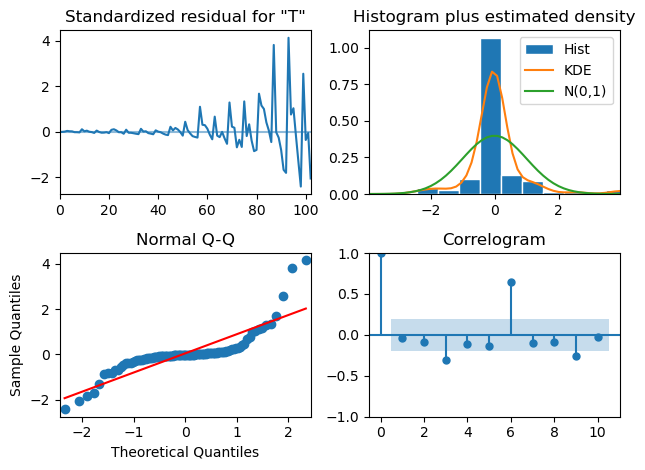

In [31]:
#since order of (1,1,1) is the best choice as per SARIMAX Statistical model, we use it for the evaluation

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(1,1,1),  enforce_invertibility=False,enforce_stationarity=False).fit()
evaluate_model(model)

C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

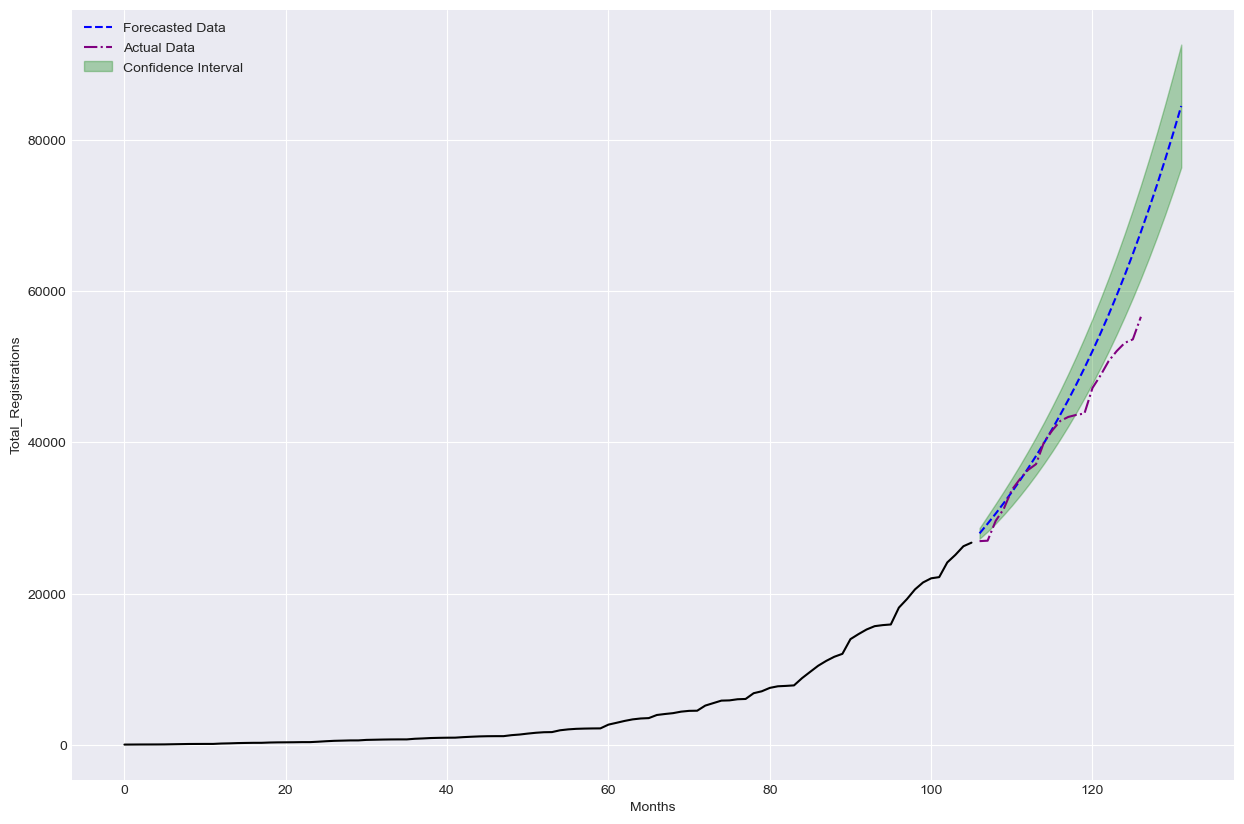

In [32]:
#forecasting future EV registrations

df_dublin_forecast = get_forecast(model, train, test, plot=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Total_Registrations   No. Observations:                  132
Model:                SARIMAX(1, 1, 1)   Log Likelihood                -951.867
Date:                 Sun, 11 Aug 2024   AIC                           1909.734
Time:                         17:00:17   BIC                           1918.314
Sample:                              0   HQIC                          1913.220
                                 - 132                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0296      0.005    206.423      0.000       1.020       1.039
ma.L1         -0.9606      0.045    -21.491      0.000      -1.048      -0.873
sigma2      3.573e+05   3.73e+04      9.568      0.000    2.84e+05     4.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               121.60
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):            1603.12   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

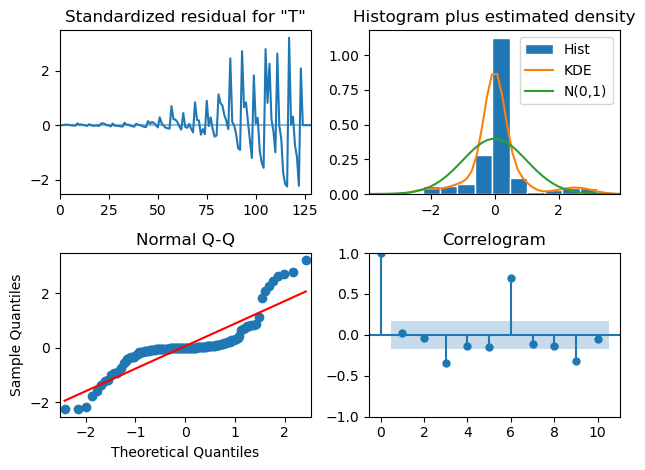

In [33]:
#using SARIMAX for capturing the forecast

model = SARIMAX(specific_county_data('Dublin').drop(columns=['County', 'Year' ,'Month', 'Date', 'Registrations']), order=(1,1,1), enforce_invertibility=False,enforce_stationarity=False).fit()
evaluate_model(model)
#specific_county_data('Dublin')


C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\92330\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

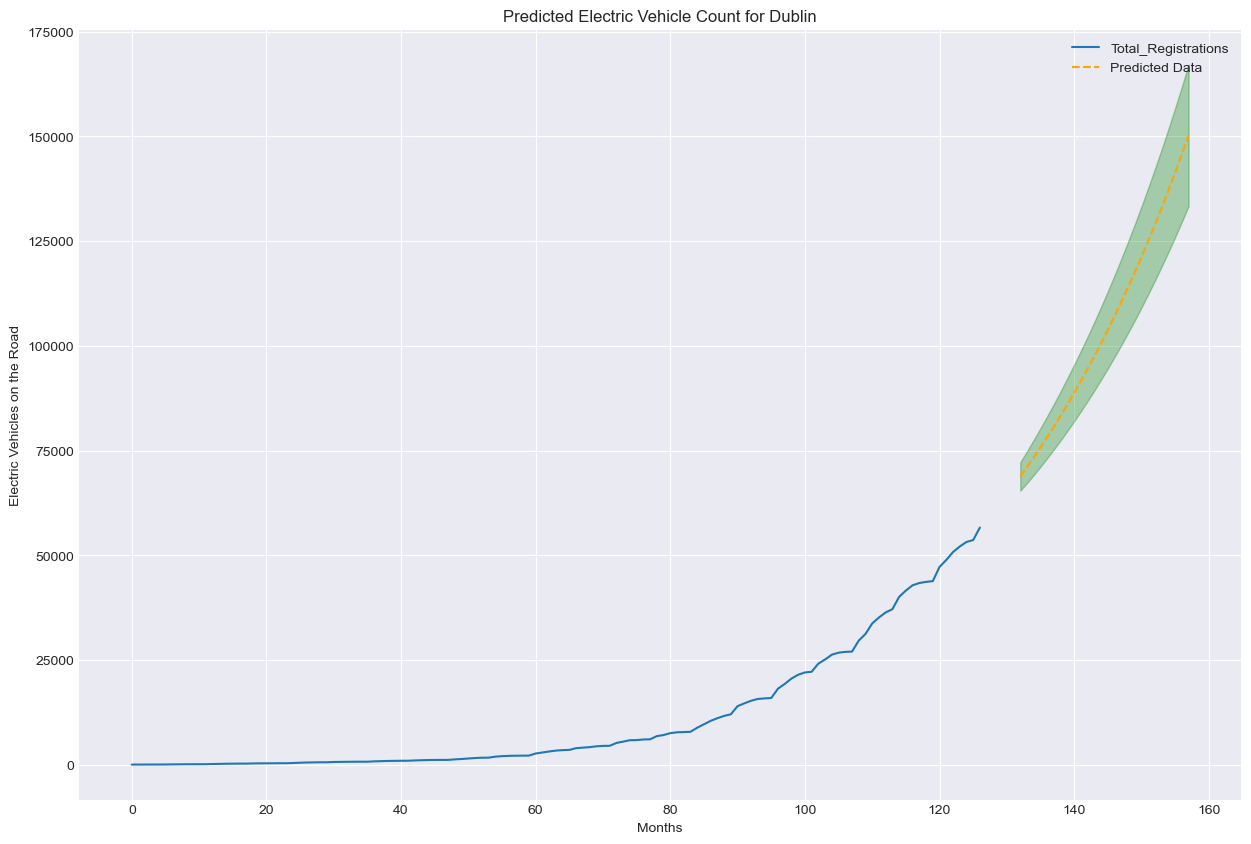

In [34]:
#creating a df of predictions and plotting

df_preds = get_prediction(model, specific_county_data('Dublin').drop(columns=['County', 'Year' ,'Month', 'Date', 'Registrations']) , test, 'Dublin', plot=True)


In [35]:
#saving predictions df to dict for later use

df_dublin_pred= specific_county_data('Dublin')
df_preds.insert(0, 'County',["Dublin"]*len(df_preds))
df_preds

,County,Lower Confidence Interval,Upper Confidence Interval,Predictions
132,Dublin,65414.686056,72221.243012,68817.964534
133,Dublin,67263.404670,74866.184855,71064.794762
134,Dublin,69176.383984,77579.733623,73378.058803
135,Dublin,71152.977646,80366.464269,75759.720957
136,Dublin,73193.248348,83230.358865,78211.803606
137,Dublin,75297.734800,86175.043057,80736.388928
138,Dublin,77467.314945,89203.926391,83335.620668
139,Dublin,79703.121365,92320.290545,86011.705955
140,Dublin,82006.486789,95527.347568,88766.917178
141,Dublin,84378.907869,98828.279969,91603.593919


In [36]:
df_preds.drop([156,157], axis=0, inplace=True)

In [37]:
Date=['Jan25','Feb25','Mar25','Apr25','May25','Jun25','July25','Aug25','Sep25','Oct25','Nov25','Dec25','Jan26','Feb26','Mar26','Apr26','May26','Jun26','July26','Aug26','Sep26','Oct26','Nov26','Dec26']
df_preds.insert(1, 'Dates',Date)


In [38]:
df_dublin= df_preds.reset_index().drop(columns=['index'])

In [39]:
df_dublin

,County,Dates,Lower Confidence Interval,Upper Confidence Interval,Predictions
0,Dublin,Jan25,65414.686056,72221.243012,68817.964534
1,Dublin,Feb25,67263.404670,74866.184855,71064.794762
2,Dublin,Mar25,69176.383984,77579.733623,73378.058803
3,Dublin,Apr25,71152.977646,80366.464269,75759.720957
4,Dublin,May25,73193.248348,83230.358865,78211.803606
5,Dublin,Jun25,75297.734800,86175.043057,80736.388928
6,Dublin,July25,77467.314945,89203.926391,83335.620668
7,Dublin,Aug25,79703.121365,92320.290545,86011.705955
8,Dublin,Sep25,82006.486789,95527.347568,88766.917178
9,Dublin,Oct25,84378.907869,98828.279969,91603.593919


In [116]:
      """If we use the current EV/Charger ratio for the county in question and assume charger installation 
       at the same current pace (although lagging behind and not the ideal situation), 
       we can extrapolate the data to get Chargers needed  for our forcasted data"""
    

ratio = top_ten_counties.loc[0, 'EV/Chargers Ratio'] # getting ratio for Dublin 
ratio

df_dublin['Chargers needed'] = df_dublin['Predictions']/ratio
df_dublin['Chargers needed'] = df_dublin['Chargers needed'].astype(int)

In [119]:
df_dublin

,County,Dates,Lower Confidence Interval,Upper Confidence Interval,Predictions,Chargers needed
0,Dublin,Jan25,65414.686056,72221.243012,68817.964534,347
1,Dublin,Feb25,67263.404670,74866.184855,71064.794762,358
2,Dublin,Mar25,69176.383984,77579.733623,73378.058803,370
3,Dublin,Apr25,71152.977646,80366.464269,75759.720957,382
4,Dublin,May25,73193.248348,83230.358865,78211.803606,395
5,Dublin,Jun25,75297.734800,86175.043057,80736.388928,407
6,Dublin,July25,77467.314945,89203.926391,83335.620668,420
7,Dublin,Aug25,79703.121365,92320.290545,86011.705955,434
8,Dublin,Sep25,82006.486789,95527.347568,88766.917178,448
9,Dublin,Oct25,84378.907869,98828.279969,91603.593919,462
